In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') # to suppress some matplotlib deprecation warnings
import os
import ast
import math

from simplification.cutil import simplify_coords

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.utils import shuffle

sns.set(style="darkgrid")


In [8]:
tr_raw_panda = pd.read_csv('../input/kaggle/train_raw/panda.csv')
tr_raw_panda.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[461, 450, 441, 431, 418, 401, 384, 368, 353...",5453565080371200,True,2017-03-13 16:53:48.790980,panda
1,BR,"[[[620, 615, 609, 604, 599, 592, 585, 578, 572...",5965556941324288,False,2017-03-09 16:19:44.633780,panda
2,BR,"[[[781, 759, 735, 707, 679, 646, 609, 571, 535...",6307234680143872,True,2017-01-26 00:21:17.363700,panda
3,US,"[[[417, 397, 384, 369, 348, 324, 301, 278, 255...",4625715938983936,True,2017-03-23 17:55:31.427700,panda
4,US,"[[[640, 634, 629, 624, 619, 612, 604, 595, 590...",5116330174840832,True,2017-01-26 16:13:48.454190,panda


In [ ]:
tr_raw_panda.drawing[0]

'[[[183, 178, 174, 169, 162, 156, 149, 142, 135, 130, 125, 120, 116, 112, 106, 101, 96, 91, 84, 79, 74, 69, 63, 57, 51, 46, 52, 57, 62, 67, 72, 76, 80, 85, 92, 97, 103, 109, 114, 118, 123, 129, 133, 128, 123, 115, 110, 102, 97, 91, 83, 75, 67, 60, 52, 46, 41, 36, 27, 20, 16, 15, 15, 15, 15, 15, 17, 23, 28, 33, 38, 44, 50, 58, 63, 69, 75, 82, 91, 97, 102, 107, 113, 119, 124, 130, 136, 143, 151, 160, 165, 170, 177, 182, 187, 193, 202, 207, 215, 221, 226, 232, 239, 245, 253, 259, 265, 271, 272, 272, 272, 271, 268, 264, 259, 252, 244, 232, 223, 214, 205, 198, 192, 187, 182, 181], [142, 147, 152, 157, 164, 170, 177, 183, 188, 192, 197, 203, 208, 213, 220, 225, 230, 234, 235, 233, 232, 232, 232, 232, 232, 232, 225, 221, 218, 213, 209, 204, 197, 190, 181, 174, 165, 158, 151, 146, 140, 132, 126, 124, 124, 125, 128, 132, 135, 139, 142, 147, 151, 153, 157, 159, 160, 160, 161, 161, 155, 145, 136, 129, 123, 118, 112, 110, 108, 105, 102, 99, 97, 93, 91, 89, 86, 84, 83, 82, 81, 80, 79, 79, 79, 79, 7

In [ ]:
len(tr_raw_panda.drawing[0])

5567

In [ ]:
tr_raw_panda.drawing[1]

'[[[785, 787, 796, 812, 815, 820, 827, 834, 852, 861, 880, 885, 896, 901, 914, 921, 926, 931, 938, 943, 951, 956, 963, 970, 984, 1011, 1043, 1061, 1079, 1087, 1092, 1098, 1115, 1120, 1127, 1136, 1151, 1163, 1173, 1184, 1195, 1201, 1212, 1228, 1237, 1250, 1256, 1262, 1270, 1272], [499, 493, 481, 467, 462, 459, 454, 450, 442, 439, 433, 432, 429, 428, 426, 426, 426, 426, 426, 426, 426, 426, 426, 426, 426, 430, 437, 440, 446, 448, 448, 448, 448, 448, 449, 451, 453, 456, 456, 458, 460, 460, 460, 460, 460, 460, 460, 460, 460, 460], [0, 68, 86, 110, 117, 135, 162, 185, 232, 246, 278, 290, 320, 348, 364, 371, 386, 389, 408, 414, 443, 479, 511, 540, 556, 588, 614, 619, 638, 653, 806, 823, 847, 856, 863, 867, 887, 907, 918, 939, 969, 972, 1012, 1016, 1019, 1038, 1043, 1051, 1082, 1310]], [[939, 941, 945, 945, 946, 947, 950, 950, 952, 954, 954, 955, 959, 974, 978, 982, 988, 994, 1004, 1022, 1030, 1041, 1061, 1079, 1089, 1094, 1099, 1103, 1107, 1107, 1108, 1108, 1106, 1103, 1098, 1087, 1082, 1075,

In [16]:
tr_simp_panda = pd.read_csv('../input/kaggle/train_simplified/ant.csv')
tr_simp_panda.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[27, 17, 16, 21, 34, 50, 49, 34, 23, 17], [4...",5421013154136064,True,2017-03-27 00:14:57.310330,ant
1,US,"[[[27, 0, 7, 40, 47, 20], [0, 41, 74, 73, 41, ...",4836123148812288,True,2017-03-06 20:00:22.521560,ant
2,US,"[[[34, 18, 14, 4, 1, 2, 10, 18, 46, 69, 83, 89...",5720952853757952,True,2017-01-23 19:53:28.354530,ant
3,US,"[[[59, 33, 16, 10, 61, 71, 69], [33, 36, 46, 5...",6345979559149568,True,2017-03-14 14:52:27.521410,ant
4,US,"[[[17, 16, 19], [140, 167, 177]], [[81, 82, 87...",4704383923126272,True,2017-01-25 21:48:31.256400,ant


In [17]:
tr_simp_turtle = pd.read_csv('../input/kaggle/train_simplified/sea turtle.csv')
tr_simp_turtle.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,BR,"[[[165, 123, 107, 87, 78, 74, 75, 91, 115, 155...",6355133241753600,True,2017-03-22 22:54:54.811920,sea turtle
1,US,"[[[91, 110, 130, 147, 184, 203, 228, 249, 246,...",5752895599280128,True,2017-01-26 20:39:26.894950,sea turtle
2,PH,"[[[32, 31, 35, 56, 117, 175, 182, 194, 196, 18...",5370008991432704,True,2017-03-10 09:35:48.968480,sea turtle
3,AU,"[[[176, 171, 154, 128, 106, 67, 51, 26, 21, 20...",6135351108173824,True,2017-03-29 12:49:48.229370,sea turtle
4,CA,"[[[101, 93, 68, 44, 37, 32, 33, 44, 82, 139, 1...",5027717747572736,True,2017-03-07 11:57:37.051620,sea turtle


In [18]:
tr_simp_turtle['word'] = tr_simp_turtle['word'].replace(' ', '_', regex=True)
tr_simp_turtle.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,BR,"[[[165, 123, 107, 87, 78, 74, 75, 91, 115, 155...",6355133241753600,True,2017-03-22 22:54:54.811920,sea_turtle
1,US,"[[[91, 110, 130, 147, 184, 203, 228, 249, 246,...",5752895599280128,True,2017-01-26 20:39:26.894950,sea_turtle
2,PH,"[[[32, 31, 35, 56, 117, 175, 182, 194, 196, 18...",5370008991432704,True,2017-03-10 09:35:48.968480,sea_turtle
3,AU,"[[[176, 171, 154, 128, 106, 67, 51, 26, 21, 20...",6135351108173824,True,2017-03-29 12:49:48.229370,sea_turtle
4,CA,"[[[101, 93, 68, 44, 37, 32, 33, 44, 82, 139, 1...",5027717747572736,True,2017-03-07 11:57:37.051620,sea_turtle


In [19]:
tr_simp_turtle.drawing[0]

'[[[165, 123, 107, 87, 78, 74, 75, 91, 115, 155, 203, 215, 238, 241, 231, 207, 154, 117], [4, 3, 8, 26, 46, 66, 81, 95, 104, 108, 108, 104, 76, 40, 24, 12, 0, 3]], [[81, 23, 18, 7, 0, 13, 36, 63, 72], [55, 52, 53, 64, 87, 93, 92, 81, 71]], [[91, 73, 69, 75, 84, 105], [89, 104, 119, 121, 120, 90]], [[189, 205, 229, 236, 237, 228, 212], [101, 114, 123, 116, 108, 103, 102]], [[241, 255], [52, 45]]]'

In [20]:
len(tr_simp_turtle.drawing[0])

397

In [22]:
df = pd.read_csv('../input/kaggle/sample_submission.csv')
df.head()

,key_id,word
0,9000003627287624,The_Eiffel_Tower airplane donut
1,9000010688666847,The_Eiffel_Tower airplane donut
2,9000023642890129,The_Eiffel_Tower airplane donut
3,9000038588854897,The_Eiffel_Tower airplane donut
4,9000052667981386,The_Eiffel_Tower airplane donut


In [23]:
df.shape

(112199, 2)

In [24]:
df2 = pd.read_csv('../input/kaggle/test_raw.csv')
df2.head()

,key_id,countrycode,drawing
0,9000003627287624,DE,"[[[537.8900146484375, 538.9500122070312, 538.9..."
1,9000010688666847,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840..."
2,9000023642890129,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238..."
3,9000038588854897,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483..."
4,9000052667981386,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759..."


In [25]:
df2.shape

(112199, 3)

In [26]:
df3 = pd.read_csv('../input/kaggle/test_simplified.csv')
df3.head()

,key_id,countrycode,drawing
0,9000003627287624,DE,"[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,UA,"[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,BG,"[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,US,"[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,AR,"[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


In [27]:
df3.shape

(112199, 3)

In [28]:
df_total = pd.merge(df, df2, on='key_id')
df_total.head()

,key_id,word,countrycode,drawing
0,9000003627287624,The_Eiffel_Tower airplane donut,DE,"[[[537.8900146484375, 538.9500122070312, 538.9..."
1,9000010688666847,The_Eiffel_Tower airplane donut,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840..."
2,9000023642890129,The_Eiffel_Tower airplane donut,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238..."
3,9000038588854897,The_Eiffel_Tower airplane donut,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483..."
4,9000052667981386,The_Eiffel_Tower airplane donut,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759..."


In [29]:
len(df_total)

112199

In [30]:
df_merge = pd.merge(df_total, df3, on=['key_id', 'countrycode'])
df_merge.head()

,key_id,word,countrycode,drawing_x,drawing_y
0,9000003627287624,The_Eiffel_Tower airplane donut,DE,"[[[537.8900146484375, 538.9500122070312, 538.9...","[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,The_Eiffel_Tower airplane donut,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840...","[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,The_Eiffel_Tower airplane donut,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238...","[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,The_Eiffel_Tower airplane donut,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483...","[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,The_Eiffel_Tower airplane donut,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759...","[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


In [31]:
df_merge.columns = ['key_id', 'word', 'countrycode', 'drawing_raw', 'drawing_simplified']
df_merge.head()

,key_id,word,countrycode,drawing_raw,drawing_simplified
0,9000003627287624,The_Eiffel_Tower airplane donut,DE,"[[[537.8900146484375, 538.9500122070312, 538.9...","[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,The_Eiffel_Tower airplane donut,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840...","[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,The_Eiffel_Tower airplane donut,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238...","[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,The_Eiffel_Tower airplane donut,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483...","[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,The_Eiffel_Tower airplane donut,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759...","[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


In [37]:
df_merge.to_csv('../data/df_merge.csv')

In [41]:
test_raw = pd.read_csv('../input/kaggle/test_raw.csv', index_col='key_id')
first_ten_ids = test_raw.iloc[:10].index
raw_images = [ast.literal_eval(lst) for lst in test_raw.loc[first_ten_ids, 'drawing'].values]

In [42]:
test_raw.head()

,countrycode,drawing
key_id,,
9000003627287624,DE,"[[[537.8900146484375, 538.9500122070312, 538.9..."
9000010688666847,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840..."
9000023642890129,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238..."
9000038588854897,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483..."
9000052667981386,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759..."


In [43]:
def resample(x, y, spacing=1.0):
    output = []
    n = len(x)
    px = x[0]
    py = y[0]
    cumlen = 0
    pcumlen = 0
    offset = 0
    for i in range(1, n):
        cx = x[i]
        cy = y[i]
        dx = cx - px
        dy = cy - py
        curlen = math.sqrt(dx*dx + dy*dy)
        cumlen += curlen
        while offset < cumlen:
            t = (offset - pcumlen) / curlen
            invt = 1 - t
            tx = px * invt + cx * t
            ty = py * invt + cy * t
            output.append((tx, ty))
            offset += spacing
        pcumlen = cumlen
        px = cx
        py = cy
    output.append((x[-1], y[-1]))
    return output
  
def normalize_resample_simplify(strokes, epsilon=1.0, resample_spacing=1.0):
    if len(strokes) == 0:
        raise ValueError('empty image')

    # find min and max
    amin = None
    amax = None
    for x, y, _ in strokes:
        cur_min = [np.min(x), np.min(y)]
        cur_max = [np.max(x), np.max(y)]
        amin = cur_min if amin is None else np.min([amin, cur_min], axis=0)
        amax = cur_max if amax is None else np.max([amax, cur_max], axis=0)

    # drop any drawings that are linear along one axis
    arange = np.array(amax) - np.array(amin)
    if np.min(arange) == 0:
        raise ValueError('bad range of values')

    arange = np.max(arange)
    output = []
    for x, y, _ in strokes:
        xy = np.array([x, y], dtype=float).T
        xy -= amin
        xy *= 255.
        xy /= arange
        resampled = resample(xy[:, 0], xy[:, 1], resample_spacing)
        simplified = simplify_coords(resampled, epsilon)
        xy = np.around(simplified).astype(np.uint8)
        output.append(xy.T.tolist())

    return output

In [44]:
simplified_drawings = []
for drawing in raw_images:
    simplified_drawing = normalize_resample_simplify(drawing)
    simplified_drawings.append(simplified_drawing)

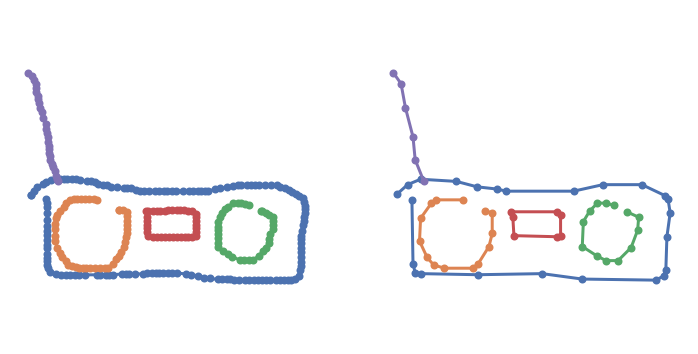

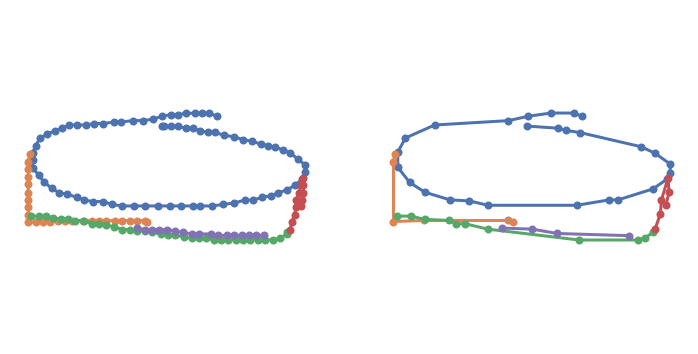

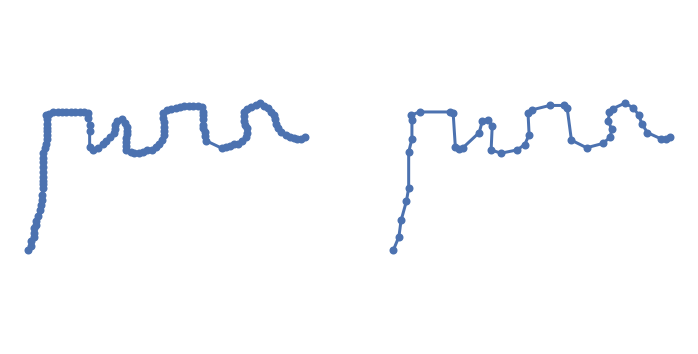

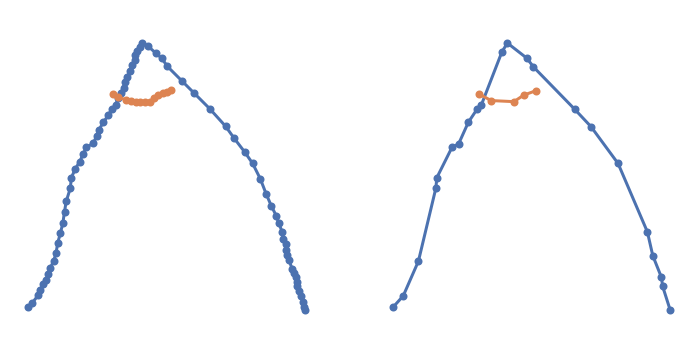

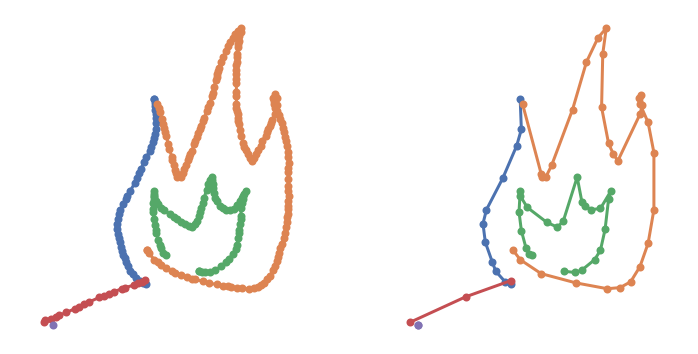

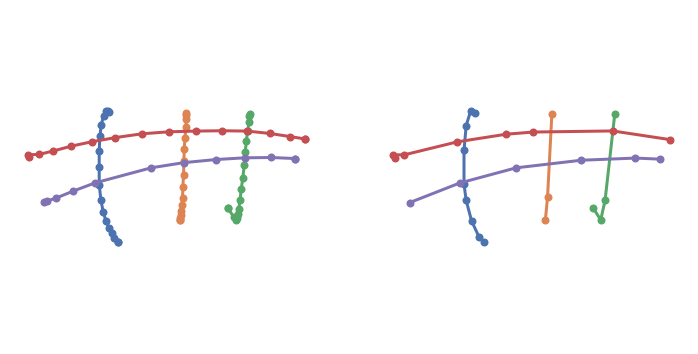

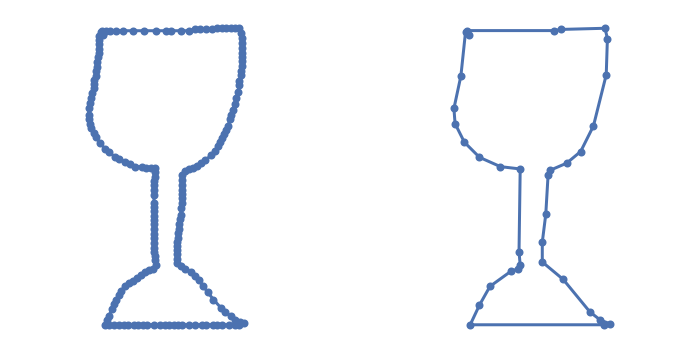

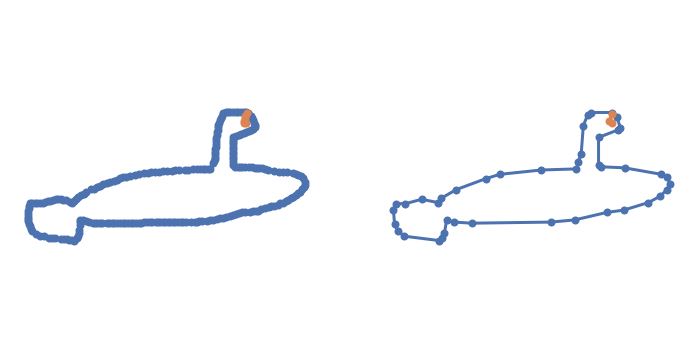

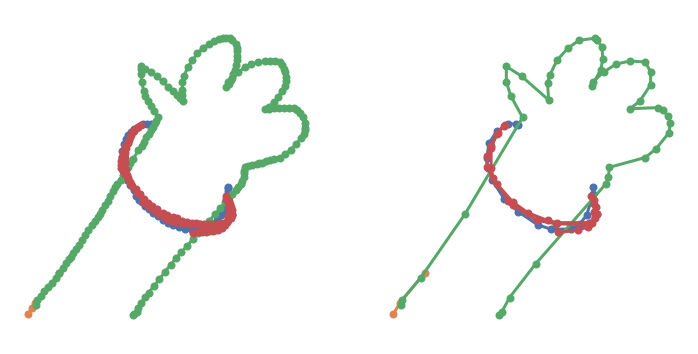

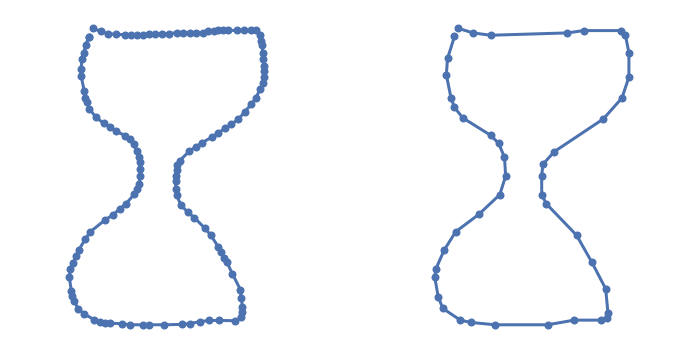

In [45]:
for index, raw_drawing in enumerate(raw_images, 0):
    
    plt.figure(figsize=(6,3))
    
    for x,y,t in raw_drawing:
        plt.subplot(1,2,1)
        plt.plot(x, y, marker='.')
        plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')

    for x,y in simplified_drawings[index]:
        plt.subplot(1,2,2)
        plt.plot(x, y, marker='.')
        plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()  

In [46]:
train_sample = pd.DataFrame()
files_directory = os.listdir("../input/kaggle/train_simplified")
for file in files_directory:
    train_sample = train_sample.append(pd.read_csv('../input/kaggle/train_simplified/' + file, index_col='key_id', nrows=10))
# Shuffle data
train_sample = shuffle(train_sample, random_state=123)

train = pd.DataFrame()
for file in files_directory[:185]:
    train = train.append(pd.read_csv('../input/kaggle/train_simplified/' + file, index_col='key_id', usecols=[1, 2, 3, 5]))
# Shuffle data
train = shuffle(train, random_state=123)

In [1]:
print('Train number of rows: ', train.shape[0])
print('Train number of columns: ', train_sample.shape[1])
print('Train set features: %s' % train_sample.columns.values)
print('Train number of label categories: %s' % len(files_directory))

NameError: name 'train' is not defined

In [ ]:
train_sample.head()


In [ ]:
count_gp = train.groupby(['word']).size().reset_index(name='count').sort_values('count', ascending=False)
top_10 = count_gp[:10]
bottom_10 = count_gp[count_gp.shape[0]-10:count_gp.shape[0]]

In [ ]:
ax_t10 = sns.barplot(x="word", y="count", data=top_10, palette="coolwarm")
ax_t10.set_xticklabels(ax_t10.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [ ]:
ax_b10 = sns.barplot(x="word", y="count", data=bottom_10, palette="BrBG")
ax_b10.set_xticklabels(ax_b10.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
count_gp


In [ ]:
sns.countplot(x="recognized", data=train)
plt.show()


In [ ]:
rec_gp = train.groupby(['word', 'recognized']).size().reset_index(name='count')
rec_true = rec_gp[(rec_gp['recognized'] == True)].rename(index=str, columns={"recognized": "recognized_true", "count": "count_true"})
rec_false = rec_gp[(rec_gp['recognized'] == False)].rename(index=str, columns={"recognized": "recognized_false", "count": "count_false"})
rec_gp = rec_true.set_index('word').join(rec_false.set_index('word'), on='word')
rec_gp

In [ ]:
words = train['word'].tolist()
drawings = [ast.literal_eval(pts) for pts in train[:9]['drawing'].values]

plt.figure(figsize=(10, 10))
for i, drawing in enumerate(drawings):
    plt.subplot(330 + (i+1))
    for x,y in drawing:
        plt.plot(x, y, marker='.')
        plt.tight_layout()
        plt.title(words[i]);
        plt.axis('off')